In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

df = pd.read_csv("mta_first_pass.csv")
df["DATE"] = pd.to_datetime(df.DATE)
df["YEAR"] = pd.DatetimeIndex(df['DATE']).year

df = df[df["YEAR"].isin(['2019','2022'])]
df = df.sort_values(["STATION","SCP","UNIT","C/A","DATE"])

df['row_count'] = df.groupby(["C/A","UNIT","SCP","STATION","YEAR"]).cumcount()+1

df["ENTRIES_PREV_DAY"] = df.ENTRIES.shift(1)
df["EXITS_PREV_DAY"] = df.EXITS.shift(1)
df = df[~df.row_count.isin(['1'])]

df["ENTRIES_PREV_DAY"] = df.ENTRIES_PREV_DAY.astype('int')
df["EXITS_PREV_DAY"] = df.EXITS_PREV_DAY.astype('int')
df["DAILY_EXITS"] = df.EXITS - df.EXITS_PREV_DAY
df["DAILY_ENTRIES"] = df.ENTRIES - df.ENTRIES_PREV_DAY
#Need to address negatives
df = df[df["DAILY_ENTRIES"]>0]

df2022 = df[df["YEAR"]==2022].groupby(["STATION"]).agg({"DAILY_ENTRIES":"sum"}).reset_index()
df2019 = df[df["YEAR"]==2019].groupby(["STATION"]).agg({"DAILY_ENTRIES":"sum"}).reset_index()

#Get Top Tens
df2022_TopTen = df2022.sort_values(["DAILY_ENTRIES"],ascending=False).head(10)
df2019_TopTen = df2019.sort_values(["DAILY_ENTRIES"],ascending=False).head(10)


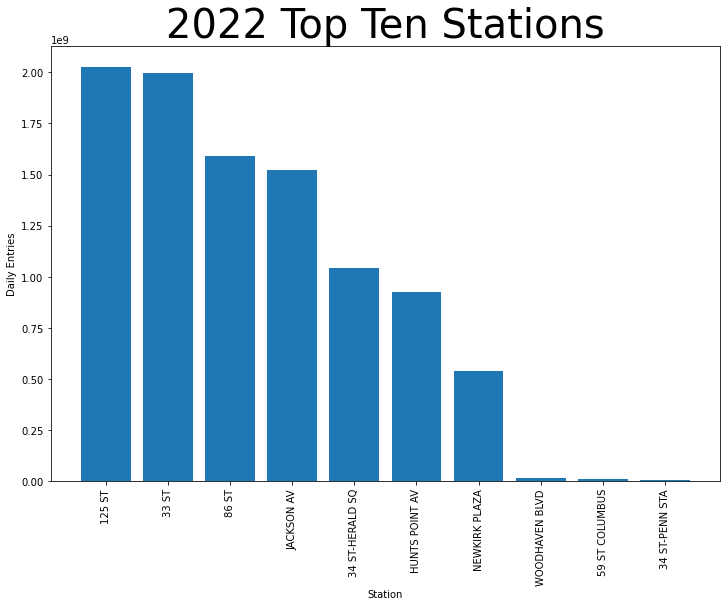

In [2]:
figure(figsize=[12,8])
plt.title('2022 Top Ten Stations',fontsize=40,color = 'k')
plt.xlabel('Station')
plt.ylabel('Daily Entries')
plt.xticks(rotation = 90)
plt.bar(df2022_TopTen.STATION,df2022_TopTen.DAILY_ENTRIES);

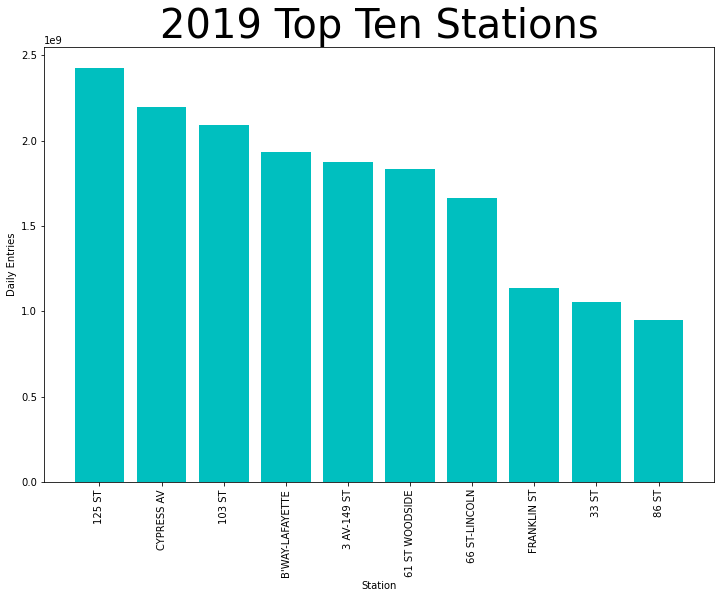

In [3]:
figure(figsize=[12,8])
plt.title('2019 Top Ten Stations',fontsize=40,color = 'k')
plt.xlabel('Station')
plt.ylabel('Daily Entries')
plt.xticks(rotation = 90)
plt.bar(df2019_TopTen.STATION,df2019_TopTen.DAILY_ENTRIES,color = 'c');

# 2019 vs 2022 Turnstile Usage Comparison MVP

This project will compare usage of public transportation from a 2019 Pre-Covid period to the current year with a goal of highlighting changes in foot traffic to help retailers reliant upon walk in customers to make better business decisions.

The data exploration so far is focused on a clean-up and aggregation of turnstile data at MTA stations in New York to provide year over year analysis.

The 2 preliminary visualization below show the top ten stations by turnstile usage in both 2022 and 2019.  A quick comparison of the 2 shows some significant differences both in the order of the top ten and in year over year usage.  For example, 33rd station went from 8th more active station to 2nd most active while Cypress Av went from 2nd most active to falling off the top ten completely.

Next Steps including continuing to clean and validate the data as well as focus on the the change in usage as a metric.